In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [97]:
train = pd.read_csv("sales_train.csv")
test = pd.read_csv("test.csv")


In [98]:
train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0



### Cleaning data

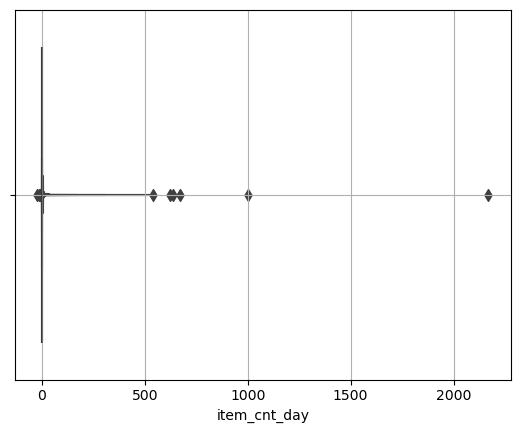

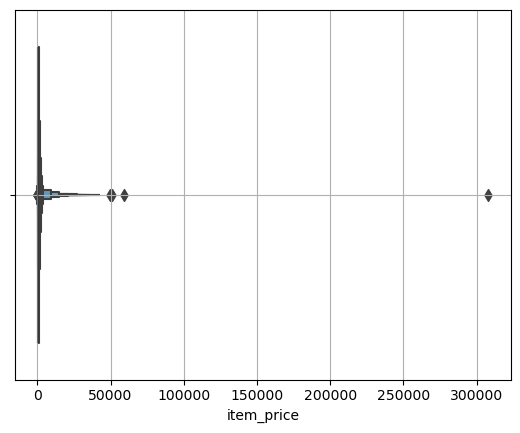

In [99]:
# Remove outliner


sns.boxenplot(data=train, x = "item_cnt_day")

plt.grid()
plt.show()

sns.boxenplot(data=train, x = "item_price")
plt.grid()
plt.show()
#Above 1000 is outliner

In [100]:
train = train[(train.item_cnt_day<=1000) & (train.item_price <300000)]
train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [101]:
train = train[train.item_price > 0].reset_index(drop=True)
train.loc[train.item_cnt_day< 1, ['item_cnt_day']] = 0
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,0.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935841,10.10.2015,33,25,7409,299.00,1.0
2935842,09.10.2015,33,25,7460,299.00,1.0
2935843,14.10.2015,33,25,7459,349.00,1.0
2935844,22.10.2015,33,25,7440,299.00,1.0


### change the train.csv to pivot table

In [102]:
pivot_train_df = train.drop(columns=["date", "item_price"])


In [103]:
pivot_train_df = pd.pivot_table(data=pivot_train_df,index=["shop_id", "item_id"], columns=["date_block_num"], values=["item_cnt_day"], fill_value=0, aggfunc=np.sum)

In [104]:
pivot_train_df.head(5)

item_cnt_day                              ...                 \
date_block_num            0   1  2  3  4  5  6  7  8  9   ... 24 25 26 27 28   
shop_id item_id                                           ...                  
0       30                 0  31  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        31                 0  11  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        32                 6  10  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        33                 3   3  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        35                 1  14  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   

                                
date_block_num  29 30 31 32 33  
shop_id item_id                 
0       30       0  0  0  0  0  
        31       0  0  0  0  0  
        32       0  0  0  0  0  
        33       0  0  0  0  0  
        35       0  0  0  0  0  

[5 rows x 34 columns]

### deal with test df

In [105]:
test.head(5)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [106]:
test = test.drop(columns=['ID'])

In [107]:
test = test.merge(right= pivot_train_df,how='left', on=["shop_id", "item_id"])
test = test.fillna(value=0)
test.head(5)

C:\Users\minht\AppData\Local\Temp\ipykernel_13320\2221059022.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  test = test.merge(right= pivot_train_df,how='left', on=["shop_id", "item_id"])


,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
test = pd.melt(test, id_vars=['shop_id', 'item_id'], var_name="date_block_num", value_name="item_cnt_month")
test.head(5)

,shop_id,item_id,date_block_num,item_cnt_month
0,5,5037,"(item_cnt_day, 0)",0.0
1,5,5320,"(item_cnt_day, 0)",0.0
2,5,5233,"(item_cnt_day, 0)",0.0
3,5,5232,"(item_cnt_day, 0)",0.0
4,5,5268,"(item_cnt_day, 0)",0.0


In [109]:
test.date_block_num = test.date_block_num.apply(lambda x: str(x).split(',')[1][:-1])
test.head(5)

,shop_id,item_id,date_block_num,item_cnt_month
0,5,5037,0,0.0
1,5,5320,0,0.0
2,5,5233,0,0.0
3,5,5232,0,0.0
4,5,5268,0,0.0


In [112]:
test.shop_id  = pd.to_numeric(test.shop_id)
pd.to_numeric(test.item_id)

0           5
1           5
2           5
3           5
4           5
           ..
7282795    45
7282796    45
7282797    45
7282798    45
7282799    45
Name: shop_id, Length: 7282800, dtype: int64